epoch: 1, accuracy: 0.8333333333333334
epoch: 2, accuracy: 0.8333333333333334
the train of perceptron ends with accuracy 1.0



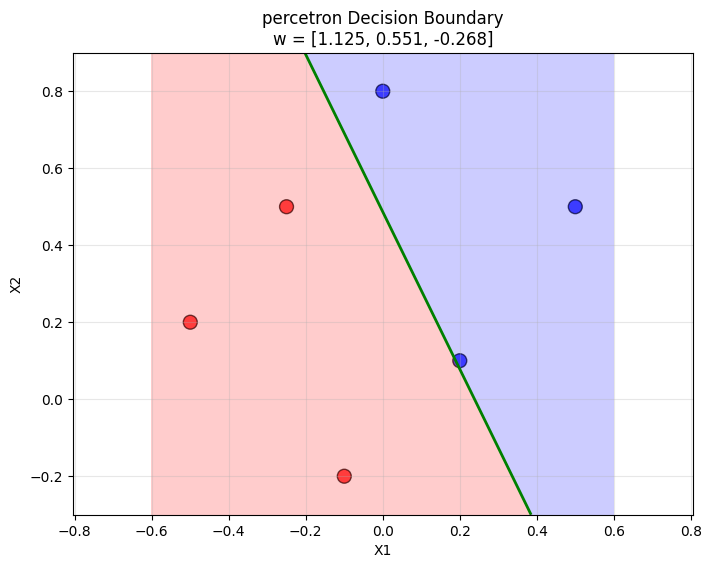

epoch: 1, accuracy: 0.23809523809523808
epoch: 2, accuracy: 0.8571428571428571
epoch: 3, accuracy: 0.6666666666666666
epoch: 4, accuracy: 0.9047619047619048
the train for multi-class classification ends with accuracy 1.0

label_truth: [ 1 -1 -1 -1 -1 -1 -1], label_predict: [ 1. -1. -1. -1. -1. -1. -1.]  True
label_truth: [-1  1 -1 -1 -1 -1 -1], label_predict: [-1.  1. -1. -1. -1. -1. -1.]  True
label_truth: [-1 -1  1 -1 -1 -1 -1], label_predict: [-1. -1.  1. -1. -1. -1. -1.]  True
label_truth: [-1 -1 -1 -1 -1 -1  1], label_predict: [-1. -1. -1. -1. -1. -1.  1.]  True
label_truth: [-1 -1 -1 -1 -1  1 -1], label_predict: [-1. -1. -1. -1. -1.  1. -1.]  True
label_truth: [-1 -1 -1 -1  1 -1 -1], label_predict: [-1. -1. -1. -1.  1. -1. -1.]  True
label_truth: [-1 -1 -1  1 -1 -1 -1], label_predict: [-1. -1. -1.  1. -1. -1. -1.]  True
label_truth: [ 1 -1 -1 -1 -1 -1 -1], label_predict: [ 1. -1. -1. -1. -1. -1. -1.]  True
label_truth: [-1  1 -1 -1 -1 -1 -1], label_predict: [-1.  1. -1. -1. -1. -

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def sgn(x):
    return 1 if x > 0 else -1


class Linear():
    def __init__(self, w, lr=0.5):
        self.w = w
        self.lr = lr

    def forward(self, x_data):

        return np.dot(x_data, self.w)
   
# 单神经元的感知机
class Percetron(Linear):
    def __init__(self, w, lr=0.5):
        super().__init__(w, lr)
    
    def forward(self, x_data):

        return super().forward(x_data)
    
    def train(self, x_data, y_data):
        for x, label in zip(x_data, y_data):
            if not sgn(self.forward(x)) == label:
                self.w += self.lr * label * x

# x_dim维度的感知机
class Model():
    def __init__(self, x_dim, y_dim, lr=0.5):
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.lr = lr
        self.net = [Percetron(w=np.random.rand(x_dim) , lr=lr) for _ in range(y_dim)]

    def forward(self, input):

        return np.array([self.net[i].forward(input) for i in range(self.y_dim)])
    
    def train(self, x_data, y_data):
        for i in range(self.y_dim):
            tmp = y_data[:,i]
            self.net[i].train(x_data, tmp)

    def predict(self, x_data):
            """
                x_data: 输入数据，形状为 (n_samples, x_dim) 或 (x_dim,)
                predictions: 预测结果，形状为 (n_samples, y_dim)
            """
            # 确保输入是二维数组
            x_data = np.array(x_data)
            if x_data.ndim == 1:
                x_data = x_data.reshape(1, -1)
            
            # 前向传播
            outputs = self.forward(x_data)
            
            # 应用符号函数得到预测结果
            predictions = np.array([[sgn(outputs[j, i]) for j in range(self.y_dim)] 
                                for i in range(x_data.shape[0])])
            
            return predictions
            

def plot_decision_boundary(w, X, y, title):
    """绘制决策边界"""
    plt.figure(figsize=(8, 6))
    
    # 绘制数据点
    colors = ['red' if label == -1 else 'blue' for label in y]
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, alpha=0.7, edgecolors='black')
    
    # 生成决策边界
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    # 创建网格点
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # 计算每个网格点的决策值
    Z = w[0] * xx + w[1] * yy + w[2]
    
    # 绘制决策边界 (Z=0 的等高线)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='green')
    
    # 填充决策区域
    plt.contourf(xx, yy, Z, levels=[-100, 0, 100], alpha=0.2, colors=['red', 'blue'])
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'{title} Decision Boundary\nw = [{w[0]:.3f}, {w[1]:.3f}, {w[2]:.3f}]')
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.show()


if __name__ == '__main__':
    ## Train for Percetron
    # load the date
    coordinate = np.array([[x[0], x[1], 1] for x in [(-0.1, -0.2), (0.5, 0.5), (-0.5, 0.2), (-0.25, 0.5), (0.2, 0.1), (0, 0.8)]])
    coordinate_label = np.array([-1, 1, -1, -1, 1, 1])
    lr1, lr2 = 0.5, 1.0
    max_epoch = 10
    # initiate the model
    np.random.seed(42)
    percetron = Percetron(w=np.random.rand(3))
    #train
    for i in range(max_epoch):  
        percetron.train(x_data=coordinate, y_data=coordinate_label)  
        output = [sgn(x) for x in percetron.forward(coordinate)] 
        accuracy = np.sum(coordinate_label == output) / len(output)

        if accuracy == 1.0 or i == max_epoch - 1:
            print(f"the train of perceptron ends with accuracy {accuracy}\n")
            plot_decision_boundary(percetron.w, coordinate[:, :2], coordinate_label, 'percetron')
            break
        else:
            print(f"epoch: {i + 1}, accuracy: {accuracy}")


    ## Train for multi-class classification
    from data import alphabet_code_data as datas
    # load and process the date
    x_dim = 64
    y_dim = 7
    input_code = np.array([data[0] + [1] for data in datas])
    input_label = np.array([data[1] for data in datas])
    input_label = np.where(input_label == 0, -1, input_label)
    # initiate the model
    model = Model(x_dim=x_dim, y_dim=y_dim)

    for i in range(max_epoch):
        model.train(x_data=input_code, y_data=input_label) 

        output = model.forward(input_code).T
        for x in range(len(output)):
            for y in range(y_dim):
                output[x][y] = sgn(output[x][y])
        equal_rows = np.all(input_label == output, axis=1)
        equal_count = np.sum(equal_rows)
        accuracy = equal_count / len(output)

        if accuracy == 1.0 or i == max_epoch - 1:
            print(f"the train for multi-class classification ends with accuracy {accuracy}\n")
            for i in range(len(output)):
                print(f"label_truth: {input_label[i]}, label_predict: {output[i]}  {np.all(input_label[i] == output[i])}")
            break
        else:
            print(f"epoch: {i + 1}, accuracy: {equal_count / len(output)}")

    ## test the model for multi-class classification

    print("=" * 50)
    print("test the model when noisy are added to the input")
    print("=" * 50)

    noisy_input_code, noisy_input_label = input_code.copy(), input_label.copy()
    # add the noisy to the copy of original data
    num_noisy_samples = min(7, len(noisy_input_code) // 3)
    print(f"add the noisy to {num_noisy_samples} samples")

    for i in range(num_noisy_samples):
        sample_idx = np.random.randint(0, len(noisy_input_code))
        pixel_idx = np.random.randint(0, x_dim - 1)  # x_dim-1 因为最后一个位置是偏置项
        original_value = noisy_input_code[sample_idx][pixel_idx]
        noisy_input_code[sample_idx][pixel_idx] = 1 - original_value
        
        print(f"sample_idx {sample_idx}: pixel_idx {pixel_idx} turn {original_value} to {1-original_value}")

    print("\ntest the prediction of model when noisy are added")
    noisy_predictions = model.predict(noisy_input_code)

    equal_rows = np.all(noisy_input_label == noisy_predictions, axis=1)
    equal_count = np.sum(equal_rows)
    accuracy = equal_count / len(noisy_predictions)

    print(f"accracy: {accuracy:.4f} ({equal_count}/{len(noisy_predictions)})")